# Estudo Dirigido II (Questão 2)

## Importando dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/viniviena/portfolio/master/dados.csv')

In [ ]:
# Resumo das colunas (Nome, valores nulos e tipo do dado)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nº                   100 non-null    int64  
 1   Resistência (lb/mg)  100 non-null    float64
 2   Comprimento (mm)     100 non-null    float64
 3   Impureza (%)x10      100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [ ]:
df = df[['Resistência (lb/mg)',	'Comprimento (mm)',	'Impureza (%)x10']]

In [ ]:
df.head(10)

,Resistência (lb/mg),Comprimento (mm),Impureza (%)x10
0,6.8,22.0,45.0
1,5.7,14.0,36.0
2,4.1,2.0,22.0
3,7.2,26.0,53.0
4,5.5,11.0,36.0
5,6.1,21.0,44.0
6,5.8,4.0,31.0
7,7.2,27.0,48.0
8,6.7,14.0,41.0
9,5.0,1.0,23.0


## Sumário Estatístico

In [ ]:
features = ['Comprimento (mm)',	'Impureza (%)x10']
target = ['Resistência (lb/mg)']

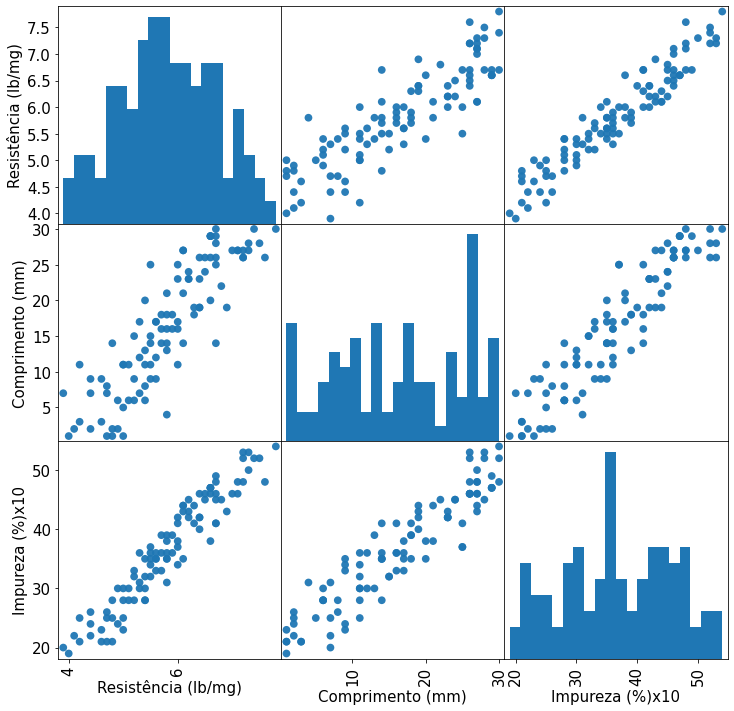

In [ ]:
# Analisando dispersão das variáveis (Aos pares e individualmente)
a = pd.plotting.scatter_matrix(df, figsize = (12,12), marker = 'o', s = 60, hist_kwds={'bins': 20}, alpha = .95)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
       a[i,j].tick_params(axis='both', which='major', labelsize=15)
       a[i,j].xaxis.label.set_size(15)
       a[i,j].yaxis.label.set_size(15)

[Text(0, 0, 'Resistência (lb/mg)'),
 Text(0, 0, 'Comprimento (mm)'),
 Text(0, 0, 'Impureza (%)x10')]

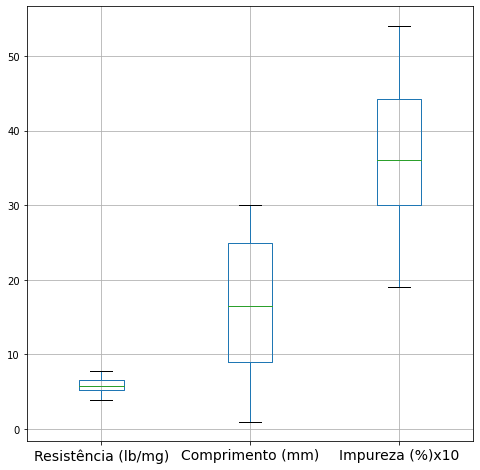

In [ ]:
b = df.boxplot(figsize = (8,8))
b.set_xticklabels(b.get_xticklabels()[:], fontdict = dict(size = 14, weight = 5))
#b.set_yticklabels(b.get_yticklabels(),fontdict = dict(size = 14, weight = 5))

In [ ]:
# Criando matriz de correlação

df.corr(method = 'pearson')

,Resistência (lb/mg),Comprimento (mm),Impureza (%)x10
Resistência (lb/mg),1.000000,0.863312,0.952585
Comprimento (mm),0.863312,1.000000,0.928537
Impureza (%)x10,0.952585,0.928537,1.000000


# Aplicando a regressão linear

Nesse caso vamos utilizar o pacote sklearn que contem uma interface simples e prática para aplicar modelos lineares em bases de dados estruturadas. Pela distribuição dos dados, um modelo linear simples parece uma boa opção para expressar a relação entre a resistência com o comprimento e a impureza.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
x = df[['Comprimento (mm)',	'Impureza (%)x10']]
y = df[['Resistência (lb/mg)']]

In [ ]:
lr.fit(X = x, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Conforme pode-se observar, o coeficiente de correlação (R2) e os parâmetros estimados do modelo estão dispostos abaixo**

In [ ]:
print(r'R^2', lr.score(x,y))
print('\n')
print('coeficientes do comprimento e impureza respectivamente', lr.coef_[0])
print('\n')
print('Termo independente (bias)', lr.intercept_)

R^2 0.9106795960442795


coeficientes do comprimento e impureza respectivamente [-0.01585446  0.10770906]


Termo independente (bias) [2.14109705]


# Análise de Agrupamento

**Para agrupar os dados, utilizamos a função *aglomerative clustering* do sklearn que é equivalente ao *hcluster* do R fazendo o agrupamento hierarquico dos dados parametrizado pelo número de grupos e a métrica de agrupamento.** 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Inicializando os grupos

cluster = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage='ward') #Default linkage is ward

#Ajustando aos dados
X_h = df[['Resistência (lb/mg)', 'Comprimento (mm)',	'Impureza (%)x10']]
cluster.fit(X_h)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [ ]:
print('vetor com indexação dos grupos', cluster.labels_)
print('o vetor tem tamanho', cluster.labels_.shape)

vetor com indexação dos grupos [3 0 4 6 0 3 1 5 2 4 0 6 0 5 3 5 4 4 2 3 0 2 1 3 2 6 5 4 1 3 5 0 0 0 6 0 4
 0 2 5 0 2 3 4 0 3 6 5 1 5 5 5 0 5 0 2 1 1 3 3 2 0 6 5 1 0 5 1 0 2 5 0 0 4
 2 5 0 4 3 1 2 1 3 0 0 5 1 1 0 5 0 1 3 1 4 3 0 0 1 5]
o vetor tem tamanho (100,)


Podemos criar uma visualização 3D interativa para ver os grupos

In [ ]:
import plotly.express as px

In [ ]:
df_clustered = pd.concat([df,pd.Series(cluster.labels_, name = 'cluster')], axis = 1)

In [ ]:
df_clustered.head(5)

,Resistência (lb/mg),Comprimento (mm),Impureza (%)x10,cluster
0,6.8,22.0,45.0,3
1,5.7,14.0,36.0,0
2,4.1,2.0,22.0,4
3,7.2,26.0,53.0,6
4,5.5,11.0,36.0,0


In [ ]:
fig = px.scatter_3d(df_clustered, x = 'Comprimento (mm)', y = 'Impureza (%)x10', z = 'Resistência (lb/mg)', color = 'cluster')
fig.show()

Podemos criar uma visualizaçao 2D aos pares também.

In [ ]:
import seaborn as sns

O gráfico abaixo mostra a distribuição aos pares e as versões contínuas dos histogramas dos grupos conhecidas como *kernel density estimators*

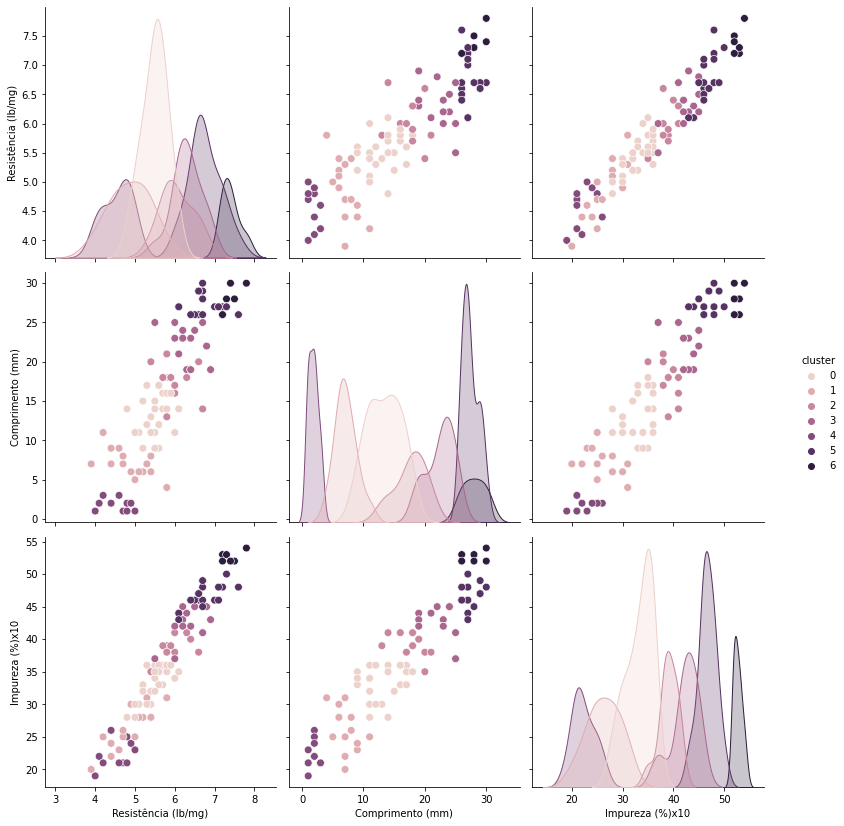

In [ ]:
g = sns.pairplot(df_clustered, hue = 'cluster', plot_kws={"s": 60})
g.fig.set_size_inches(12,12)